# Importing necessary libraries

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# Loading The Data

In [2]:
# loading the dataset from the csv file
df = pd.read_csv('../Data/feature_engineered.csv')

# Data Overview

In [3]:
print("First Five Rows:\n")
df.head()

First Five Rows:



,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family_size
0,0,3,male,22,7.2500,S,Mr,Small
1,1,1,female,38,71.2833,C,Mrs,Small
2,1,3,female,26,7.9250,S,Miss,Alone
3,1,1,female,35,53.1000,S,Mrs,Small
4,0,3,male,35,8.0500,S,Mr,Alone


# Train-Test Split

In [4]:
X = df.drop('Survived', axis=1)
X.head()

,Pclass,Sex,Age,Fare,Embarked,Title,Family_size
0,3,male,22,7.2500,S,Mr,Small
1,1,female,38,71.2833,C,Mrs,Small
2,3,female,26,7.9250,S,Miss,Alone
3,1,female,35,53.1000,S,Mrs,Small
4,3,male,35,8.0500,S,Mr,Alone


In [5]:
y = df['Survived'].copy()

In [6]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train

,Pclass,Sex,Age,Fare,Embarked,Title,Family_size
331,1,male,45,28.5000,S,Mr,Alone
733,2,male,23,13.0000,S,Mr,Alone
382,3,male,32,7.9250,S,Mr,Alone
704,3,male,26,7.8542,S,Mr,Small
813,3,female,6,31.2750,S,Miss,Large
...,...,...,...,...,...,...,...
106,3,female,21,7.6500,S,Miss,Alone
270,1,male,28,31.0000,S,Mr,Alone
860,3,male,41,14.1083,S,Mr,Small
435,1,female,14,120.0000,S,Miss,Small


# loading pipeline and transforming X_train, X_test

In [12]:
pipeline= pickle.load(open('../Feature Engineering/pipeline1.pkl','rb'))

In [14]:
# Transforming the training and testing data using the pipeline
X_train_transformed = pipeline.transform(X_train)
X_test_transformed = pipeline.transform(X_test)

# Model fit and Metric Evaluation

In [15]:
# Fitting the models and evaluating performance
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),  # Increased iterations for convergence
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

In [16]:
# Dictionary to store model scores
model_scores = {}

# Training and evaluating each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    
    # Calculating accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Storing results
    model_scores[model_name] = accuracy
    print(f"Accuracy of {model_name}: {accuracy * 100:.2f}%")
    print(f"Classification Report for {model_name}:\n{report}")

# Display model scores
print("\nModel Scores:", model_scores)

Training Decision Tree...
Accuracy of Decision Tree: 77.65%
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       105
           1       0.73      0.73      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

Training Logistic Regression...
Accuracy of Logistic Regression: 81.01%
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Training Random Forest...
Accuracy of Random Forest: 83.24%
Classification Report for Random Forest:
              precision  

- Decision Tree achieved an accuracy of 77.65%. It has a precision, recall, and F1-score of 0.77. While it performs decently, it is prone to overfitting and may not generalize well.

- Logistic Regression performed better with an accuracy of 81.01%. It maintains a balanced precision and recall of 0.80. It is a good choice for binary classification and is easy to interpret.

- Random Forest performed the best with an accuracy of 83.24%. It benefits from ensemble learning, making it more robust and capable of handling variance effectively.

- Overall, Random Forest is the best-performing model, followed by Logistic Regression. Decision Tree is the weakest as it may overfit the data.

# Hypertunning RandomFOrest with GridSearchCV
- RandomFOrest (with no hypertunning) gives better performance when compared to logistic regression, and decision tree

In [17]:
# Setting up the Random Forest model with GridSearchCV for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initializing the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Setting up GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fitting the grid search to the training data
grid_search.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [18]:
# Extracting the best model from grid search
best_rf = grid_search.best_estimator_

# Evaluating the best model on the test set
y_pred = best_rf.predict(X_test_transformed)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Random Forest Model Accuracy: {accuracy * 100:.2f}%")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Best Random Forest Model Accuracy: 84.92%
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       105
           1       0.83      0.80      0.81        74

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



Interpretation of the Model's Performance:
1. Overall Accuracy: 84.92%

    The Random Forest model achieved an accuracy of 84.92%, meaning the model correctly predicted the outcome for approximately 85% of the data points in the test set. This is a good performance, especially in real-world classification tasks where achieving higher accuracy can be challenging.

2. Classification Report:

The classification report provides important metrics for each class (0 and 1 in my case), which include precision, recall, f1-score, and support.
- Class 0:
        Precision (0.86): Precision is the proportion of true positive predictions (correctly predicted as class 0) out of all instances predicted as class 0. Here, 86% of the instances predicted as class 0 were actually class 0.
        Recall (0.89): Recall is the proportion of actual class 0 instances that were correctly identified by the model. Here, 89% of the true class 0 instances were correctly predicted.
        F1-Score (0.87): The F1-score is the harmonic mean of precision and recall. A higher F1-score indicates a better balance between precision and recall. In this case, the F1-score is 0.87, which is a good result for class 0.
        Support (105): This refers to the number of actual instances of class 0 in the test set (105 samples).

- Class 1:
        Precision (0.83): Precision for class 1 is 83%, meaning 83% of the instances predicted as class 1 were actually class 1.
        Recall (0.80): Recall for class 1 is 80%, meaning the model correctly identified 80% of the true class 1 instances.
        F1-Score (0.81): The F1-score for class 1 is 0.81, indicating that there is a reasonable balance between precision and recall.
        Support (74): This refers to the number of actual instances of class 1 in the test set (74 samples).

1. Macro Average:

    The macro average gives an average performance score for each metric across both classes, treating each class equally:
        Precision: 0.85
        Recall: 0.84
        F1-Score: 0.84
    These values indicate that, overall, the model performs fairly evenly across both classes.

2. Weighted Average:

    The weighted average accounts for the support (number of instances) of each class:
        Precision: 0.85
        Recall: 0.85
        F1-Score: 0.85
    The weighted average shows a slightly higher overall performance, as it takes into account the imbalance in class distribution (more samples of class 0). It suggests that, on average, the model performs well in both classes, but it might be better at classifying the more prevalent class (0).

Key Findings:

- Class Imbalance: There is a slight class imbalance, with more samples of class 0. The model performs better on class 0 in terms of recall and precision, which is expected when the classes are imbalanced.
- Balanced Performance: The model shows a good balance between precision and recall for both classes, with slightly better performance on class 0.
- Model Strengths: The high accuracy, F1-scores (both macro and weighted), and solid recall for both classes indicate that the Random Forest model is effective and generalizes well across different types of instances.


Conclusion:

Your Random Forest model shows a strong overall performance, especially with an accuracy of 84.92% and decent F1-scores for both classes. However, you may want to investigate handling the class imbalance further, especially if class 1 is of particular importance in your applicatio

In [76]:
# import pickle
# pickle.dump(best_rf, open('random_forest1.pkl','wb'))

# Deep Learning Approach


In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input



In [20]:
y_train.shape

(712,)

In [21]:
X_train_transformed.shape

(712, 11)

## Adding layers to neural network and compiling

In [65]:
classifier = Sequential()
classifier.add(Input(shape=(11,))) 
classifier.add(layer = Dense(units = 4,  activation = 'relu', input_dim = 11))
classifier.add(layer = Dense(units = 4, activation = 'relu'))
classifier.add(layer = Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

c:\Users\LENOVO\Desktop\treeleaf\'treeleaf_vnev'\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
history = classifier.fit(X_train_transformed, y_train, batch_size=10, epochs=100, validation_split=0.2)


Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6614 - loss: 0.6920 - val_accuracy: 0.6503 - val_loss: 0.6885
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6255 - loss: 0.6883 - val_accuracy: 0.6503 - val_loss: 0.6841
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6009 - loss: 0.6867 - val_accuracy: 0.6503 - val_loss: 0.6807
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6056 - loss: 0.6839 - val_accuracy: 0.6503 - val_loss: 0.6769
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6096 - loss: 0.6813 - val_accuracy: 0.6503 - val_loss: 0.6740
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6736 - loss: 0.6697 - val_accuracy: 0.6503 - val_loss: 0.6707
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6393 - loss: 0.6722 - val_accuracy: 0.6503 - val_loss: 0.6682
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6071 - loss: 0.6764 - val_accuracy: 0.6503 - v

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[0.47617787],
       [0.16338193],
       [0.1503157 ],
       [0.9768146 ],
       [0.68130386],
       [0.96421915],
       [0.56496364],
       [0.13193828],
       [0.64604   ],
       [0.9892047 ],
       [0.36246154],
       [0.1323618 ],
       [0.3883061 ],
       [0.13286398],
       [0.15962443],
       [0.9894224 ],
       [0.33127412],
       [0.56505024],
       [0.22284502],
       [0.19724667],
       [0.14718792],
       [0.208231  ],
       [0.50332946],
       [0.15037335],
       [0.14439833],
       [0.3066898 ],
       [0.26506543],
       [0.16345723],
       [0.33897966],
       [0.3883061 ],
       [0.15110454],
       [0.3883061 ],
       [0.20125167],
       [0.3883061 ],
       [0.15190497],
       [0.11559401],
       [0.214217  ],
       [0.56496364],
       [0.97612226],
       [0.14411542],
       [0.1933856 ],
       [0.12260611],
       [0.144122  ],
       [0.11061349],
       [0.71756876],
       [0.14328726],
       [0.15111624],
       [0.148

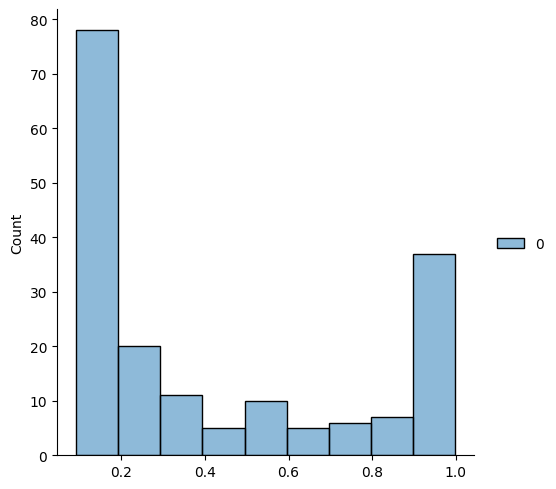

In [67]:
y_log = classifier.predict(X_test_transformed)
sns.displot(y_log, kde = False)
y_log

In [77]:
# pickle.dump(classifier, open('ANN1.pkl','wb'))

# setting y_pred value to 1 when probability is greater than 0.5 otherwise 0

In [68]:
y_pred = np.where(y_log > 0.5, 1, 0)

## Accuracy Score

In [69]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8156


- The Artificial Neural Network (ANN) achieved an accuracy of 81.56%, meaning the model correctly predicted the outcome for about 81.56% of the test data. This is quite good, especially when compared to the Random Forest model's 84.92%, but let's dive into the other metrics for a more detailed understanding.

## confusion matrix

In [70]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")



Confusion Matrix:
[[93 12]
 [21 53]]


- The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives:
- True Negatives (TN) = 93: The number of times class 0 was correctly predicted as class 0.
- False Positives (FP) = 12: The number of times class 0 was incorrectly predicted as class 1.
- False Negatives (FN) = 21: The number of times class 1 was incorrectly predicted as class 0.
- True Positives (TP) = 53: The number of times class 1 was correctly predicted as class 1.

# Classification report

In [71]:
# Classification Report (Precision, Recall, F1-Score)
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



- The classification report provides detailed metrics for both classes (0 and 1).
-Class 0:
        Precision (0.82): Precision for class 0 is 82%, meaning 82% of the instances predicted as class 0 were actually class 0.
        Recall (0.89): Recall for class 0 is 89%, meaning 89% of the actual class 0 instances were correctly predicted.
        F1-Score (0.85): The F1-score for class 0 is 0.85, indicating a strong balance between precision and recall.
        Support (105): The number of actual class 0 instances in the test set.

- Class 1:
        Precision (0.82): Precision for class 1 is also 82%, meaning 82% of the instances predicted as class 1 were actually class 1.
        Recall (0.72): Recall for class 1 is 72%, meaning 72% of the actual class 1 instances were correctly predicted.
        F1-Score (0.76): The F1-score for class 1 is 0.76, which is lower than class 0, indicating a bit of a trade-off between precision and recall.
        Support (74): The number of actual class 1 instances in the test set.

- Macro Average:

    The macro average calculates the mean performance of the model across all classes, treating each class equally:
        Precision: 0.82
        Recall: 0.80
        F1-Score: 0.81
    These values suggest that, on average, the model performs well across both classes, but the recall is slightly lower than the precision due to the lower recall for class 1.

- Weighted Average:

    The weighted average accounts for the support (number of instances) of each class:
        Precision: 0.82
        Recall: 0.82
        F1-Score: 0.81
    The weighted average gives an overall performance score that reflects the imbalance between the two classes. It shows that the model performs similarly across both classes when considering the support.

- Key Findings:

    - Class Imbalance: Like the Random Forest model, the ANN model deals with a slight class imbalance. There are more instances of class 0 than class 1, which could be why class 1 has a lower recall.
    Precision vs. Recall:
        For class 0, both precision (82%) and recall (89%) are high, which is good. The model is good at identifying class 0 and avoiding false positives.
        For class 1, recall (72%) is lower than precision (82%), indicating that while the model is good at predicting class 1 when it does, it misses 28% of the true class 1 instances.
    - F1-Score for Class 1: The lower F1-score for class 1 (0.76) compared to class 0 (0.85) indicates that there's room for improvement, especially in minimizing false negatives for class 1.

## AUc_ROC curve

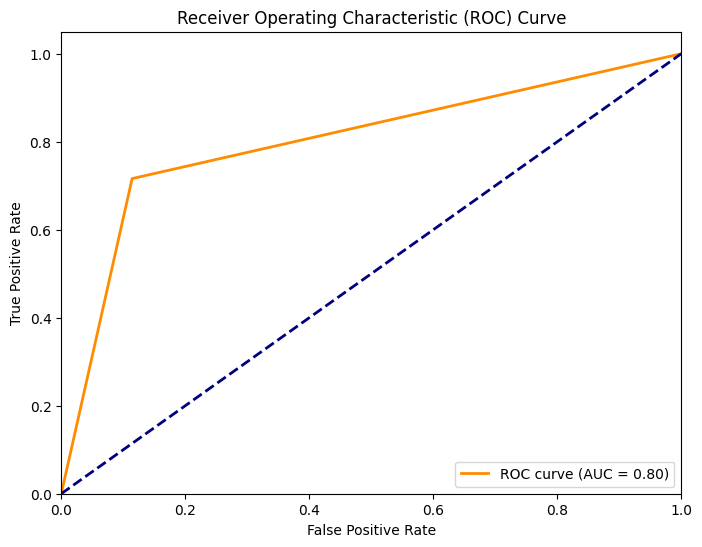

In [72]:

# Get the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Checkig if the model generalize between train and test data - Overcome overfitting

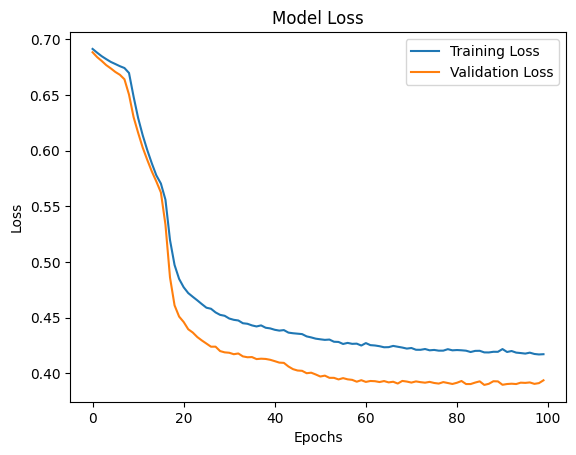

In [73]:

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

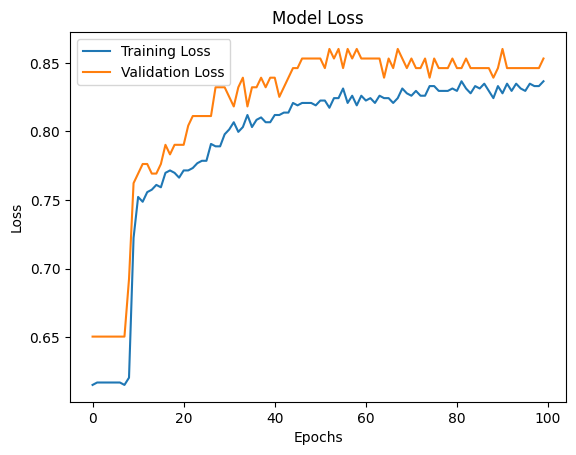

In [74]:

# Plotting training and validation loss
plt.plot(history.history['accuracy'], label='Training Loss')
plt.plot(history.history['val_accuracy'], label='Validation Loss')

plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()